<a href="https://colab.research.google.com/github/a-charmisri/Smart_phones_analysis/blob/main/smart_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv('smartphones.csv')

# 1. numbers with median
numeric_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity',
                'fast_charging', 'primary_camera_front']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#mode
df['processor_brand'].fillna(df['processor_brand'].mode()[0], inplace=True)
df['os'].fillna(df['os'].mode()[0], inplace=True)


binary_columns = {
    '5G_or_not': '5G',
    'fast_charging_available': 'Fast Charging',
    'extended_memory_available': 'Extended Memory'
}
for col, label in binary_columns.items():
    df[col] = df[col].map({1: 'Yes', 0: 'No'})


df['brand_name'] = df['brand_name'].str.title()
df['processor_brand'] = df['processor_brand'].str.title()
df['os'] = df['os'].str.upper()


df['screen_resolution'] = df['resolution_height'] * df['resolution_width']
df['camera_total'] = df['primary_camera_rear'] + df['primary_camera_front']


df.to_csv('smartphones_cleaned.csv', index=False)
print("✅ Data cleaned and saved as 'smartphones_cleaned.csv'")


✅ Data cleaned and saved as 'smartphones_cleaned.csv'


<ipython-input-19-ac939dae1a1b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processor_brand'].fillna(df['processor_brand'].mode()[0], inplace=True)
<ipython-input-19-ac939dae1a1b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [20]:
pip install matplotlib seaborn pandas


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphones_cleaned.csv")


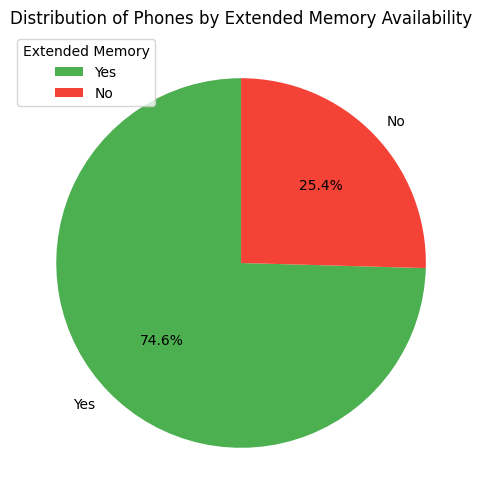

In [22]:
import matplotlib.pyplot as plt

labels = ['Yes', 'No']
values = [340, 116]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Phones by Extended Memory Availability')
plt.legend(title="Extended Memory")
plt.show()

<ipython-input-23-342e827a1a11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


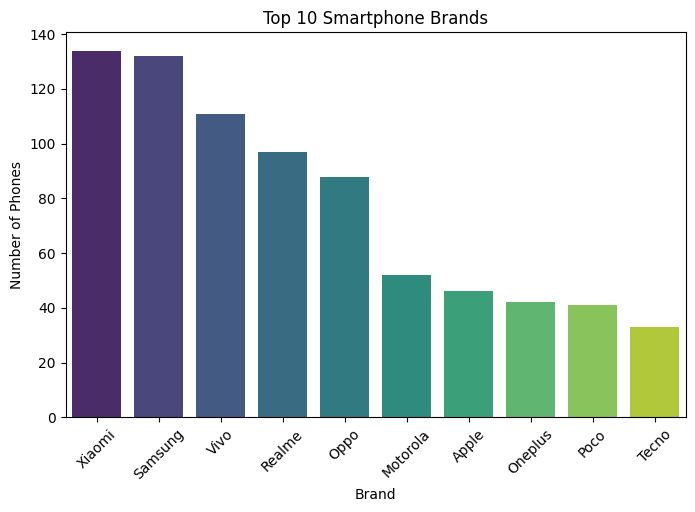

In [23]:
brand_counts = df['brand_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Top 10 Smartphone Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45)
plt.show()


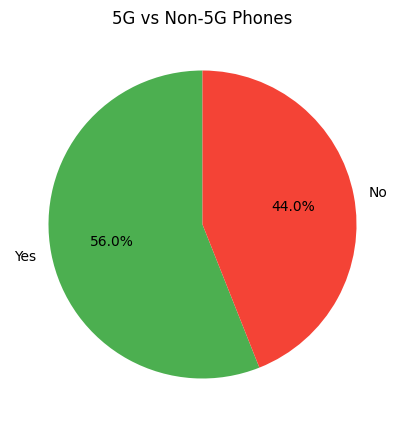

In [24]:
counts = df['5G_or_not'].value_counts()
labels = counts.index
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(5,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('5G vs Non-5G Phones')
plt.show()


<ipython-input-25-857e420b1390>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')


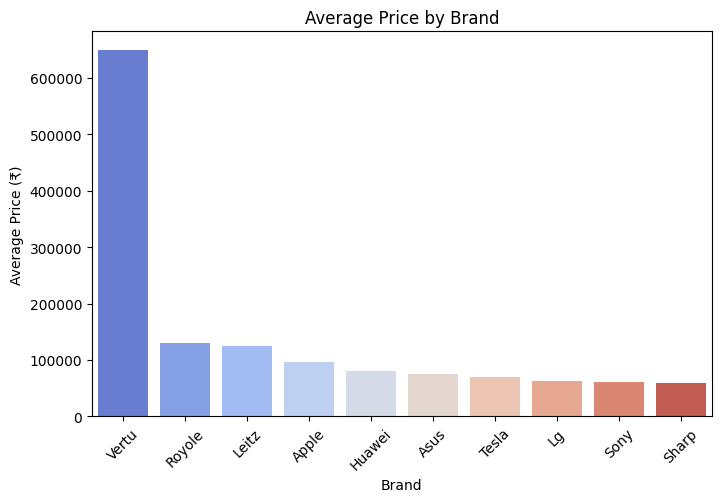

In [25]:
avg_price = df.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title('Average Price by Brand')
plt.ylabel('Average Price (₹)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()


<ipython-input-26-b402c1fe4659>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


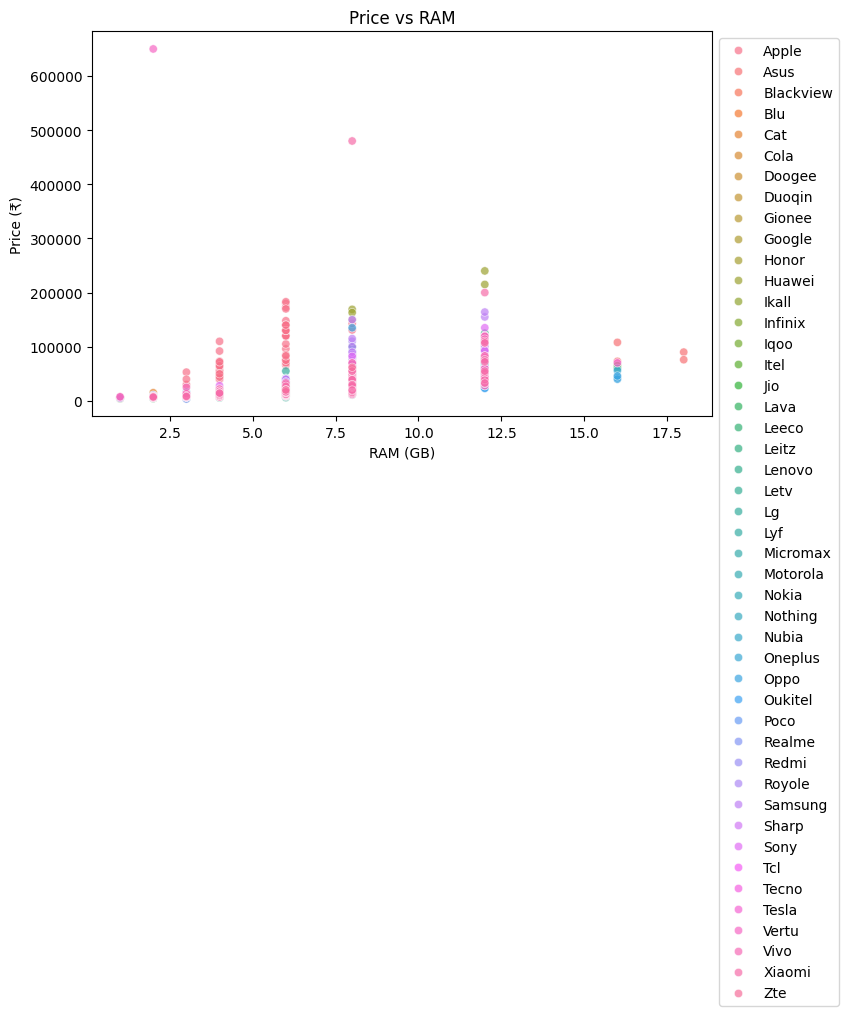

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='ram_capacity', y='price', hue='brand_name', alpha=0.7)
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [27]:
df.columns = df.columns.str.strip().str.replace(' ', '_')